# ASL Recognition with Deep Learning

### Table of Contents

* [Project Overview](#chapter1)
* [Loading the ASL Image Dataset](#chapter2)
    * [Section 1.2](sSection_1_2)
        * [Section 1.2.1](#section_1_2_1)
        * [Section 1.2.2](#section_1_2_2)
        * [Section 1.2.3](#section_1_2_3)
* [Chapter 2](#chapter2)
    * [Section 2.1](#section_2_1)
    * [Section 2.2](#section_2_2)

## 1. Project Overview <a class="anchor" id="chapter1"></a> 

American Sign Language (ASL) is the primary language used by many deaf individuals in North America, and it is also used by hard-of-hearing and hearing individuals. The language is as rich as spoken languages and employs signs made with the hand, along with facial gestures and bodily postures.

![](pictures/asl.png)

A lot of recent progress has been made towards developing computer vision systems that translate sign language to spoken language. This technology often relies on complex neural network architectures that can detect subtle patterns in streaming video. However, as a first step, towards understanding how to build a translation system, we can reduce the size of the problem by translating individual letters, instead of sentences.

**In this notebook**, we will train a convolutional neural network to classify images of American Sign Language (ASL) letters. After loading, examining, and preprocessing the data, we will train the network and test its performance.

In the code cell below, we load the training and test data.

* `x_train` and `x_test` are arrays of image data.
* `y_train` and `y_test` are arrays of category labels.

## 2. Loading the ASL Image Dataset <a class="anchor" id="chapter2"></a> 

To load the training data, we will:
* Define the file paths for the training and testing datasets
* Create a list of folders' names for each ASL symbol to avoid using `os.listdir()`
* Load the needed libraries and set NumPy random seed
* Define functions to load, shuffle, and split the data

In [4]:
# Define the file paths for the training and testing datasets
train_dir = '/Users/inmilk306/Documents/projects/ASL_Recognition w_DL/archive/asl_alphabet_train/asl_alphabet_train'
test_dir = '/Users/inmilk306/Documents/projects/ASL_Recognition w_DL/archive/asl_alphabet_test/asl_alphabet_test'

In [5]:
# Create a list of folders' names for each ASL symbol
folder = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','del','nothing','space']

In [7]:
# Import packages and set numpy random seed
import random
import numpy as np
from os.path import join
from os import listdir
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image

np.random.seed(5) 
tf.random.set_seed(2)
%matplotlib inline

# Define functions to load, shuffle, and split the data
def load_data(container_path=train_dir, folders=folder,
              size=87000, test_split=0.2, seed=0): # 3000 images in 29 classes
    """
    Loads sign language dataset.
    """
    
    filenames, labels = [], []

    for label, folder in enumerate(folders):
        folder_path = join(container_path, folder)
        images = [join(folder_path, d)
                     for d in sorted(listdir(folder_path))]
        labels.extend(len(images) * [label])
        filenames.extend(images)
    
    random.seed(seed)
    data = list(zip(filenames, labels))
    random.shuffle(data)
    data = data[:size]
    filenames, labels = zip(*data)

    
    # Get the images
    x = paths_to_tensor(filenames).astype('float32')/255
    # Store the one-hot targets
    y = np.array(labels)

    x_train = np.array(x[:int(len(x) * (1 - test_split))])
    y_train = np.array(y[:int(len(x) * (1 - test_split))])
    x_test = np.array(x[int(len(x) * (1 - test_split)):])
    y_test = np.array(y[int(len(x) * (1 - test_split)):])
     
    print('Loaded', len(x_train),'images for training,','Train data shape =',x_train.shape)
    print('Loaded', len(x_test),'images for testing','Test data shape =',x_test.shape)
    print('Loaded', len(x_train),'images for training,','Train data shape =',x_train.shape)
    print('Loaded', len(x_test),'images for testing','Test data shape =',x_test.shape)
    return (x_train, y_train), (x_test, y_test)


def path_to_tensor(img_path, size):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(size, size))
    # convert PIL.Image.Image type to 3D tensor
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor 
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths, size=50):
    list_of_tensors = [path_to_tensor(img_path, size) for img_path in img_paths]
    return np.vstack(list_of_tensors)

In [8]:
# Load pre-shuffled training and test datasets
(x_train, y_train), (x_test, y_test) = load_data()

Loaded 69600 images for training, Train data shape = (69600, 50, 50, 3)
Loaded 17400 images for testing Test data shape = (17400, 50, 50, 3)


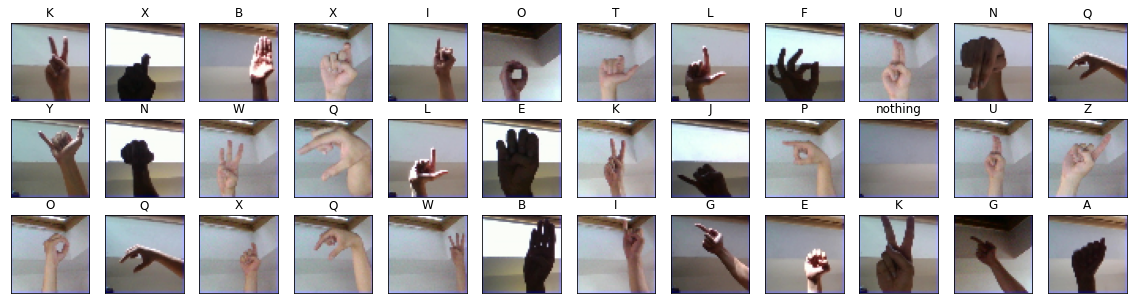

In [6]:
# Store labels of dataset
#labels = folder

# Print the first several training images, along with the labels
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title("{}".format(labels[y_train[i]]))
plt.show()

In [11]:
# Number of A's in the training dataset
num_A_train = sum(y_train==0)
# Number of B's in the training dataset
num_B_train = sum(y_train==1)
# Number of C's in the training dataset
num_C_train = sum(y_train==2)

# Number of A's in the test dataset
num_A_test = sum(y_test==0)
# Number of B's in the test dataset
num_B_test = sum(y_test==1)
# Number of C's in the test dataset
num_C_test = sum(y_test==2)

# Print statistics about the dataset
print("Training set:")
print("\tA: {}, B: {}, C: {}".format(num_A_train, num_B_train, num_C_train))
print("Test set:")
print("\tA: {}, B: {}, C: {}".format(num_A_test, num_B_test, num_C_test))

Training set:
	A: 2361, B: 2354, C: 2423
Test set:
	A: 639, B: 646, C: 577


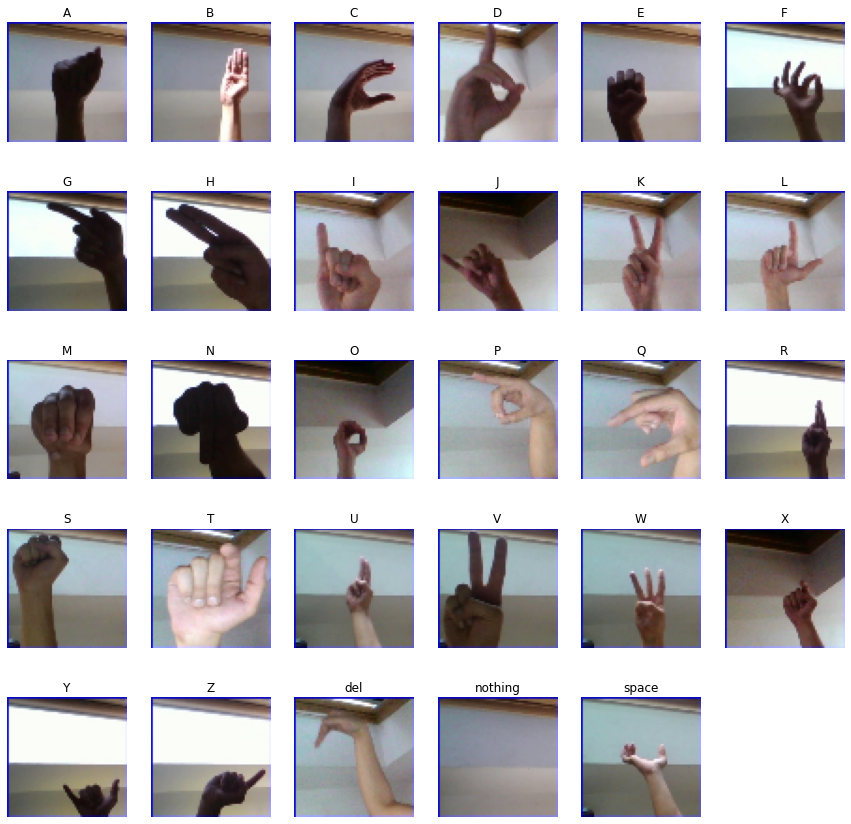

In [8]:
fig = plt.figure(figsize = (15,15))
def plot_images(fig, image, label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    plt.title(label)
    return

image_index = 0
row = 5
col = 6
for i in range(1,(row*col)):
    plot_images(fig, images_for_plot[image_index], labels_for_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()

In [5]:
#import random
import os
import numpy as np
import matplotlib.pyplot as plt
#from tensorflow.keras.utils import to_categorical
#from keras.preprocessing import image
import cv2


In [7]:
def load_unique():
    size_img = 64,64 
    images_for_plot = []
    labels_for_plot = []
    for f in folder:
        for file in os.listdir(train_dir + '/' + f):
            filepath = train_dir + '/' + f + '/' + file
            image = cv2.imread(filepath)
            final_img = cv2.resize(image, size_img)
            final_img = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
            images_for_plot.append(final_img)
            labels_for_plot.append(f)
            break
    return images_for_plot, labels_for_plot

images_for_plot, labels_for_plot = load_unique()
print("unique_labels = ", labels_for_plot)

unique_labels =  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [9]:
    print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
    print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)

NameError: name 'X_train' is not defined

In [10]:
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25,'space':26,'del':27,'nothing':28}

def load_data():
    images = []
    labels = []
    size = 64,64
    print("LOADING DATA FROM : ",end = "")
    for folder in os.listdir(train_dir):
        print(folder, end = ' | ')
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            if folder == 'A':
                labels.append(labels_dict['A'])
            elif folder == 'B':
                labels.append(labels_dict['B'])
            elif folder == 'C':
                labels.append(labels_dict['C'])
            elif folder == 'D':
                labels.append(labels_dict['D'])
            elif folder == 'E':
                labels.append(labels_dict['E'])
            elif folder == 'F':
                labels.append(labels_dict['F'])
            elif folder == 'G':
                labels.append(labels_dict['G'])
            elif folder == 'H':
                labels.append(labels_dict['H'])
            elif folder == 'I':
                labels.append(labels_dict['I'])
            elif folder == 'J':
                labels.append(labels_dict['J'])
            elif folder == 'K':
                labels.append(labels_dict['K'])
            elif folder == 'L':
                labels.append(labels_dict['L'])
            elif folder == 'M':
                labels.append(labels_dict['M'])
            elif folder == 'N':
                labels.append(labels_dict['N'])
            elif folder == 'O':
                labels.append(labels_dict['O'])
            elif folder == 'P':
                labels.append(labels_dict['P'])
            elif folder == 'Q':
                labels.append(labels_dict['Q'])
            elif folder == 'R':
                labels.append(labels_dict['R'])
            elif folder == 'S':
                labels.append(labels_dict['S'])
            elif folder == 'T':
                labels.append(labels_dict['T'])
            elif folder == 'U':
                labels.append(labels_dict['U'])
            elif folder == 'V':
                labels.append(labels_dict['V'])
            elif folder == 'W':
                labels.append(labels_dict['W'])
            elif folder == 'X':
                labels.append(labels_dict['X'])
            elif folder == 'Y':
                labels.append(labels_dict['Y'])
            elif folder == 'Z':
                labels.append(labels_dict['Z'])
            elif folder == 'space':
                labels.append(labels_dict['space'])
            elif folder == 'del':
                labels.append(labels_dict['del'])
            elif folder == 'nothing':
                labels.append(labels_dict['nothing'])
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    labels = keras.utils.to_categorical(labels)
    
    X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.05)
    
    print()
    print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
    print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    return X_train, X_test, Y_train, Y_test

In [12]:
import os

In [13]:
X_train, X_test, Y_train, Y_test = load_data()

LOADING DATA FROM : .DS_Store | 

NotADirectoryError: [Errno 20] Not a directory: '/Users/inmilk306/Documents/projects/ASL_Recognition w_DL/archive/asl_alphabet_train/asl_alphabet_train/.DS_Store'

In [9]:
for f in folder:
    for file in os.listdir(train_dir + '/' + f): 
        filepath = train_dir + '/' + f + '/' + file
        print(filepath)
        h

/Users/inmilk306/Documents/projects/ASL_Recognition w_DL/archive/asl_alphabet_train/asl_alphabet_train/A/A25.jpg


NameError: name 'h' is not defined

In [ ]:
def load_unique():
    size_img = 64,64 
    images_for_plot = []
    labels_for_plot = []
    for folder in os.listdir(train_dir):
        for file in os.listdir(train_dir + '/' + folder):
            filepath = train_dir + '/' + folder + '/' + file
            image = cv2.imread(filepath)
            final_img = cv2.resize(image, size_img)
            final_img = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
            images_for_plot.append(final_img)
            labels_for_plot.append(folder)
            break
    return images_for_plot, labels_for_plot

images_for_plot, labels_for_plot = load_unique()
print("unique_labels = ", labels_for_plot)

In [ ]:
IMAGE_SIZE = 64
NUM_CLASSES = 29 # 26 in Alphabet + nothing + space + del
CLASS_NAMES = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','del','nothing','space']
train_len = 87000 # 3000 images in 29 classes

In [ ]:
def load_train_data(folder_path):
    X = np.empty((train_len, IMAGE_SIZE, IMAGE_SIZE, 3), dtype=np.float32)
    y = np.empty((train_len,), dtype=int)
    cnt = 0
    for folder_name in os.listdir(folder_path):
        if folder_name == '.DS_Store':
            pass
        else:
            for image_path in os.listdir(folder_path + folder_name):
                img = cv2.imread(folder_path + folder_name + '/'+ image_path)
                if img is not None:
                    img = resize(img, (IMAGE_SIZE, IMAGE_SIZE, 3))
                    img_arr = np.asarray(img).reshape((-1, IMAGE_SIZE, IMAGE_SIZE, 3))
                    X[cnt] = img_arr
                    y[cnt] = CLASS_NAMES.index(folder_name)
                    cnt += 1
        return X, y

x_train, y_train = load_train_data(train_dir)
print("Data is loaded successfully!")

In [ ]:
print("The shape of x_train is: {}".format(x_train.shape))
print("The shape of y_train is: {}".format(y_train.shape))

In [ ]:
fig = plt.figure(figsize = (15,15))
def plot_images(fig, image, label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    plt.title(label)
    return

image_index = 0
row = 5
col = 6
for i in range(1,(row*col)):
    plot_images(fig, images_for_plot[image_index], labels_for_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()

In [ ]:
labels = ['A','B','C']

# Print the first several training images, along with the labels
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title("{}".format(labels[y_train[i]]))
plt.show()

In [ ]:
import random
i = random.randint(0, train_len-1)
plt.imshow(x_train[i])
plt.show()
print(f"Label: {CLASS_NAMES[y_train[i]]}")

In [ ]:
print(os.listdir("/Users/inmilk306/Documents/"))


In [ ]:
os.listdir(train_dir)

In [ ]:
def load_data(container_path='train_dir', folders=['A', 'B', 'C'],
              size=2000, test_split=0.2, seed=0):
    """
    Loads sign language dataset.
    """
    
    filenames, labels = [], []

    for label, folder in enumerate(folders):
        folder_path = join(container_path, folder)
        images = [join(folder_path, d)
                     for d in sorted(listdir(folder_path))]
        labels.extend(len(images) * [label])
        filenames.extend(images)
    
    random.seed(seed)
    data = list(zip(filenames, labels))
    random.shuffle(data)
    data = data[:size]
    filenames, labels = zip(*data)

    
    # Get the images
    x = paths_to_tensor(filenames).astype('float32')/255
    # Store the one-hot targets
    y = np.array(labels)

    x_train = np.array(x[:int(len(x) * (1 - test_split))])
    y_train = np.array(y[:int(len(x) * (1 - test_split))])
    x_test = np.array(x[int(len(x) * (1 - test_split)):])
    y_test = np.array(y[int(len(x) * (1 - test_split)):])

    return (x_train, y_train), (x_test, y_test)


def path_to_tensor(img_path, size):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(size, size))
    # convert PIL.Image.Image type to 3D tensor
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor 
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths, size=50):
    list_of_tensors = [path_to_tensor(img_path, size) for img_path in img_paths]
    return np.vstack(list_of_tensors)


"""
    num_types = len(data['target_names'])
    targets = np_utils.to_categorical(np.array(data['target']), num_types)
"""


In [ ]:
import random
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
from os import listdir
from os.path import isdir, join


def load_data(container_path='datasets', folders=['A', 'B', 'C'],
              size=2000, test_split=0.2, seed=0):
    """
    Loads sign language dataset.
    """
    
    filenames, labels = [], []

    for label, folder in enumerate(folders):
        folder_path = join(container_path, folder)
        images = [join(folder_path, d)
                     for d in sorted(listdir(folder_path))]
        labels.extend(len(images) * [label])
        filenames.extend(images)
    
    random.seed(seed)
    data = list(zip(filenames, labels))
    random.shuffle(data)
    data = data[:size]
    filenames, labels = zip(*data)

    
    # Get the images
    x = paths_to_tensor(filenames).astype('float32')/255
    # Store the one-hot targets
    y = np.array(labels)

    x_train = np.array(x[:int(len(x) * (1 - test_split))])
    y_train = np.array(y[:int(len(x) * (1 - test_split))])
    x_test = np.array(x[int(len(x) * (1 - test_split)):])
    y_test = np.array(y[int(len(x) * (1 - test_split)):])

    return (x_train, y_train), (x_test, y_test)


def path_to_tensor(img_path, size):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(size, size))
    # convert PIL.Image.Image type to 3D tensor
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor 
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths, size=50):
    list_of_tensors = [path_to_tensor(img_path, size) for img_path in img_paths]
    return np.vstack(list_of_tensors)


"""
    num_types = len(data['target_names'])
    targets = np_utils.to_categorical(np.array(data['target']), num_types)
"""


In [ ]:
# Import packages and set numpy random seed
import numpy as np
np.random.seed(5) 
import tensorflow as tf
#tf.set_random_seed(2)
from datasets import sign_language
import matplotlib.pyplot as plt
%matplotlib inline

# Load pre-shuffled training and test datasets
(x_train, y_train), (x_test, y_test) = sign_language.load_data()

In [ ]:
import random
import numpy as np
from keras.utils import np_utils, to_categorical
from keras.preprocessing import image
from os import listdir
from os.path import isdir, join


def load_data(container_path='datasets', folders=['A', 'B', 'C'],
              size=2000, test_split=0.2, seed=0):
    """
    Loads sign language dataset.
    """
    
    filenames, labels = [], []

    for label, folder in enumerate(folders):
        folder_path = join(container_path, folder)
        images = [join(folder_path, d)
                     for d in sorted(listdir(folder_path))]
        labels.extend(len(images) * [label])
        filenames.extend(images)
    
    random.seed(seed)
    data = list(zip(filenames, labels))
    random.shuffle(data)
    data = data[:size]
    filenames, labels = zip(*data)

    
    # Get the images
    x = paths_to_tensor(filenames).astype('float32')/255
    # Store the one-hot targets
    y = np.array(labels)

    x_train = np.array(x[:int(len(x) * (1 - test_split))])
    y_train = np.array(y[:int(len(x) * (1 - test_split))])
    x_test = np.array(x[int(len(x) * (1 - test_split)):])
    y_test = np.array(y[int(len(x) * (1 - test_split)):])

    return (x_train, y_train), (x_test, y_test)


def path_to_tensor(img_path, size):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(size, size))
    # convert PIL.Image.Image type to 3D tensor
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor 
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths, size=50):
    list_of_tensors = [path_to_tensor(img_path, size) for img_path in img_paths]
    return np.vstack(list_of_tensors)


"""
    num_types = len(data['target_names'])
    targets = np_utils.to_categorical(np.array(data['target']), num_types)
"""


This is a data cleaning and analysis project.

Our aim is to find mobile apps that are profitable for the App Store and Google Play markets and recommend an app profile that can be profitable for both markets.

For this project, we'll pretend we're working as data analysts for a company that builds Android and iOS mobile apps. We make our apps available on Google Play and in the App Store.



## 2. Getting started <a class="anchor" id="chapter2"></a>

In [ ]:
print("u")

### Chapter 1 <a class="anchor" id="chapter1"></a>

#### Section 1.1 <a class="anchor" id="section_1_1"></a>

#### Section 1.2 <a class="anchor" id="section_1_2"></a>

##### Section 1.2.1 <a class="anchor" id="section_1_2_1"></a>

##### Section 1.2.2 <a class="anchor" id="section_1_2_2"></a>

##### Section 1.2.3 <a class="anchor" id="section_1_2_3"></a>

### Chapter 2 <a class="anchor" id="chapter2"></a>

#### Section 2.1 <a class="anchor" id="section_2_1"></a>

#### Section 2.2 <a class="anchor" id="section_2_2"></a>

In [ ]:
import random
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
from os import listdir
from os.path import isdir, join


def load_data(container_path='datasets', folders=['A', 'B', 'C'],
              size=2000, test_split=0.2, seed=0):
    """
    Loads sign language dataset.
    """
    
    filenames, labels = [], []

    for label, folder in enumerate(folders):
        folder_path = join(container_path, folder)
        images = [join(folder_path, d)
                     for d in sorted(listdir(folder_path))]
        labels.extend(len(images) * [label])
        filenames.extend(images)
    
    random.seed(seed)
    data = list(zip(filenames, labels))
    random.shuffle(data)
    data = data[:size]
    filenames, labels = zip(*data)

    
    # Get the images
    x = paths_to_tensor(filenames).astype('float32')/255
    # Store the one-hot targets
    y = np.array(labels)

    x_train = np.array(x[:int(len(x) * (1 - test_split))])
    y_train = np.array(y[:int(len(x) * (1 - test_split))])
    x_test = np.array(x[int(len(x) * (1 - test_split)):])
    y_test = np.array(y[int(len(x) * (1 - test_split)):])

    return (x_train, y_train), (x_test, y_test)


def path_to_tensor(img_path, size):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(size, size))
    # convert PIL.Image.Image type to 3D tensor
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor 
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths, size=50):
    list_of_tensors = [path_to_tensor(img_path, size) for img_path in img_paths]
    return np.vstack(list_of_tensors)


"""
    num_types = len(data['target_names'])
    targets = np_utils.to_categorical(np.array(data['target']), num_types)
"""


In [ ]:
# Import packages and set numpy random seed
import numpy as np
np.random.seed(5) 
import tensorflow as tf
tf.random.set_seed(2)
#from datasets import sign_language
import matplotlib.pyplot as plt
%matplotlib inline

# Load pre-shuffled training and test datasets
(x_train, y_train), (x_test, y_test) = load_data()

In [7]:
from os import listdir
from os.path import isdir, join



['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'del',
 'nothing',
 'space']